In [2]:
# 한국인 데이터 전처리
import pandas as pd
korean_data=pd.read_csv('../data/korean_data.csv')
korean_data

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),식사요법 이유,평소 식사량과 비교,고강도 신체활동 여부,중강도 신체활동 여부
0,1.0,75.0,159.8,58.9,23.065440,624.642550,8.0,3.0,2.0,2.0
1,2.0,70.0,151.2,41.8,18.284063,922.289958,8.0,2.0,2.0,2.0
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,2.0,2.0
3,2.0,9.0,142.0,35.8,17.754414,3476.032477,8.0,1.0,8.0,8.0
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,8.0,2.0,2.0,2.0
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,8.0,2.0,2.0,1.0
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,8.0,2.0,2.0,1.0
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,2.0,2.0,1.0


In [3]:
# 결측치 확인하기 
# 성별 1:남자, 2:여자
# 식사요법이유 1:질환,2:체중을조절하기위해서 3:기타 8:비해당 9모름
# 평소 식사량과 비교 : 1. 많이 섭취하였다 2. 평소와 비슷하였다 3. 적게 섭취하였다
# 고강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
# 중강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
korean_data[korean_data.isna().any(axis=1)]

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),식사요법 이유,평소 식사량과 비교,고강도 신체활동 여부,중강도 신체활동 여부
7,1.0,53.0,NaN,NaN,NaN,2405.776439,8.0,1.0,9.0,9.0
57,1.0,59.0,164.8,75.0,27.615115,NaN,NaN,NaN,2.0,2.0
64,2.0,52.0,NaN,90.8,NaN,1479.626568,8.0,3.0,2.0,2.0
98,2.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0
135,1.0,16.0,NaN,NaN,NaN,2457.228521,2.0,1.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
6753,1.0,62.0,164.5,69.8,25.794292,NaN,NaN,NaN,2.0,1.0
6812,1.0,60.0,163.2,67.4,25.305772,NaN,NaN,NaN,9.0,9.0
6835,2.0,62.0,149.6,52.1,23.279548,NaN,NaN,NaN,9.0,9.0
6891,1.0,30.0,179.7,62.4,19.323618,NaN,NaN,NaN,9.0,9.0


In [4]:
korean_data=korean_data[korean_data['평소 식사량과 비교']==2.0]

In [6]:
# 결측치 제거
korean_data.dropna(inplace=True)

C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\2821118841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data.dropna(inplace=True)


In [7]:
# 고강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
# 중강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
korean_data=korean_data[(korean_data['고강도 신체활동 여부']!=8.0)]

In [8]:
# 초기값 설정
korean_data['활동량계수'] = '1.2'

# 조건에 따라 값 업데이트
korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 2.0) & (korean_data['중강도 신체활동 여부'] == 1.0),
    '활동량계수'
] = '1.375'

korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 1.0) & (korean_data['중강도 신체활동 여부'] == 2.0),
    '활동량계수'
] = '1.725'

korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 1.0) & (korean_data['중강도 신체활동 여부'] == 1.0),
    '활동량계수'
] = '1.9'
korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 9.0) & (korean_data['중강도 신체활동 여부'] == 9.0),
    '활동량계수'
] = '1.55'


In [9]:
#korean_data.drop('고강도 신체활동 여부',axis=1,inplace=True)
#korean_data.drop('중강도 신체활동 여부',axis=1,inplace=True)
korean_data.drop('식사요법 이유',axis=1,inplace=True)
korean_data.drop('평소 식사량과 비교',axis=1,inplace=True)
korean_data

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수
1,2.0,70.0,151.2,41.8,18.284063,922.289958,2.0,2.0,1.2
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.2
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.2
8,1.0,42.0,172.5,67.7,22.751523,2243.391641,2.0,2.0,1.2
18,2.0,38.0,160.9,43.4,16.764000,1649.091552,2.0,2.0,1.2
...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,2.0,2.0,1.2
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,2.0,1.0,1.375
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.375
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,1.0,1.375


In [10]:
korean_data['활동량계수'] = pd.to_numeric(korean_data['활동량계수'], errors='coerce')

# 초기 일일권장섭취량 열 추가
korean_data['일일권장섭취량'] = 0

# 성별이 1(남성)인 경우
korean_data.loc[korean_data['성별'] == 1.0, '일일권장섭취량'] = ((
    10 * korean_data['체중'] +
    6.25 * korean_data['신장'] -
    5 * korean_data['나이'] +
    5
)* korean_data['활동량계수'])

# 성별이 2(여성)인 경우
korean_data.loc[korean_data['성별'] == 2.0, '일일권장섭취량'] = ((
    10 * korean_data['체중'] +
    6.25 * korean_data['신장'] -
    5 * korean_data['나이'] -
    161
)*korean_data['활동량계수'])
korean_data

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수,일일권장섭취량
1,2.0,70.0,151.2,41.8,18.284063,922.289958,2.0,2.0,1.200,1022.400000
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.200,1372.050000
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.200,2093.100000
8,1.0,42.0,172.5,67.7,22.751523,2243.391641,2.0,2.0,1.200,1860.150000
18,2.0,38.0,160.9,43.4,16.764000,1649.091552,2.0,2.0,1.200,1306.350000
...,...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,2.0,2.0,1.200,1503.600000
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,2.0,1.0,1.375,1580.046875
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.375,1158.953125
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,1.0,1.375,2123.000000


In [11]:
# 평소 식사량과 비교
korean_data[korean_data['에너지 섭취량(Kcal)']>=korean_data['일일권장섭취량']]

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수,일일권장섭취량
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.200,1372.050000
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.200,2093.100000
8,1.0,42.0,172.5,67.7,22.751523,2243.391641,2.0,2.0,1.200,1860.150000
18,2.0,38.0,160.9,43.4,16.764000,1649.091552,2.0,2.0,1.200,1306.350000
21,2.0,61.0,166.1,59.6,21.602648,2101.634152,2.0,1.0,1.375,1606.171875
...,...,...,...,...,...,...,...,...,...,...
6915,2.0,72.0,153.2,60.2,25.649503,1294.454663,2.0,2.0,1.200,1246.200000
6916,1.0,48.0,172.0,81.3,27.481071,3157.521515,2.0,2.0,1.200,1983.600000
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,2.0,1.0,1.375,1580.046875
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.375,1158.953125


In [12]:
korean_data.drop(['고강도 신체활동 여부','중강도 신체활동 여부','체질량지수'],axis=1,inplace=True)

In [13]:
# 체중 변화 예측해볼 데이터
korean_data['일일 칼로리 잉여/적자'] = korean_data['에너지 섭취량(Kcal)']-korean_data['일일권장섭취량']


In [14]:
korean_data=korean_data[['나이','성별','신장','체중','활동량계수','일일권장섭취량','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']]

In [15]:
korean_data.reset_index(drop=True)

,나이,성별,신장,체중,활동량계수,일일권장섭취량,에너지 섭취량(Kcal),일일 칼로리 잉여/적자
0,70.0,2.0,151.2,41.8,1.200,1022.400000,922.289958,-100.110042
1,42.0,2.0,156.7,53.5,1.200,1372.050000,3521.884974,2149.834974
2,43.0,1.0,185.0,79.8,1.200,2093.100000,2624.110312,531.010312
3,42.0,1.0,172.5,67.7,1.200,1860.150000,2243.391641,383.241641
4,38.0,2.0,160.9,43.4,1.200,1306.350000,1649.091552,342.741552
...,...,...,...,...,...,...,...,...
4292,80.0,1.0,162.4,63.3,1.200,1503.600000,1346.633466,-156.966534
4293,78.0,2.0,157.3,71.7,1.375,1580.046875,1838.070072,258.023197
4294,61.0,2.0,145.1,40.2,1.375,1158.953125,1686.294918,527.341793
4295,57.0,1.0,172.8,74.4,1.375,2123.000000,1629.256388,-493.743612


# 시각화

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # Windows 환경
# rc('font', family='AppleGothic')  # Mac 환경

# 음수 표시 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


<Axes: >

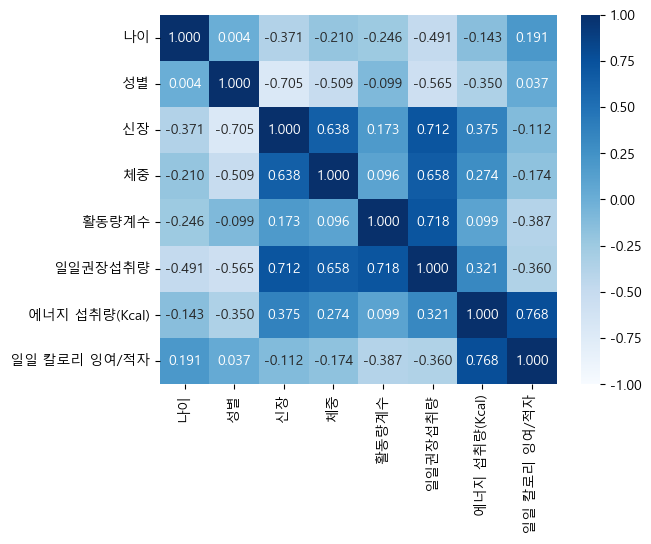

In [17]:
r = korean_data.corr(numeric_only=True)
sns.heatmap(r,vmin=-1,vmax=1,annot=True,fmt='.3f',cmap='Blues')

C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\1625581600.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data['연령대'] = pd.cut(korean_data['나이'], bins=bins, labels=labels, right=False)


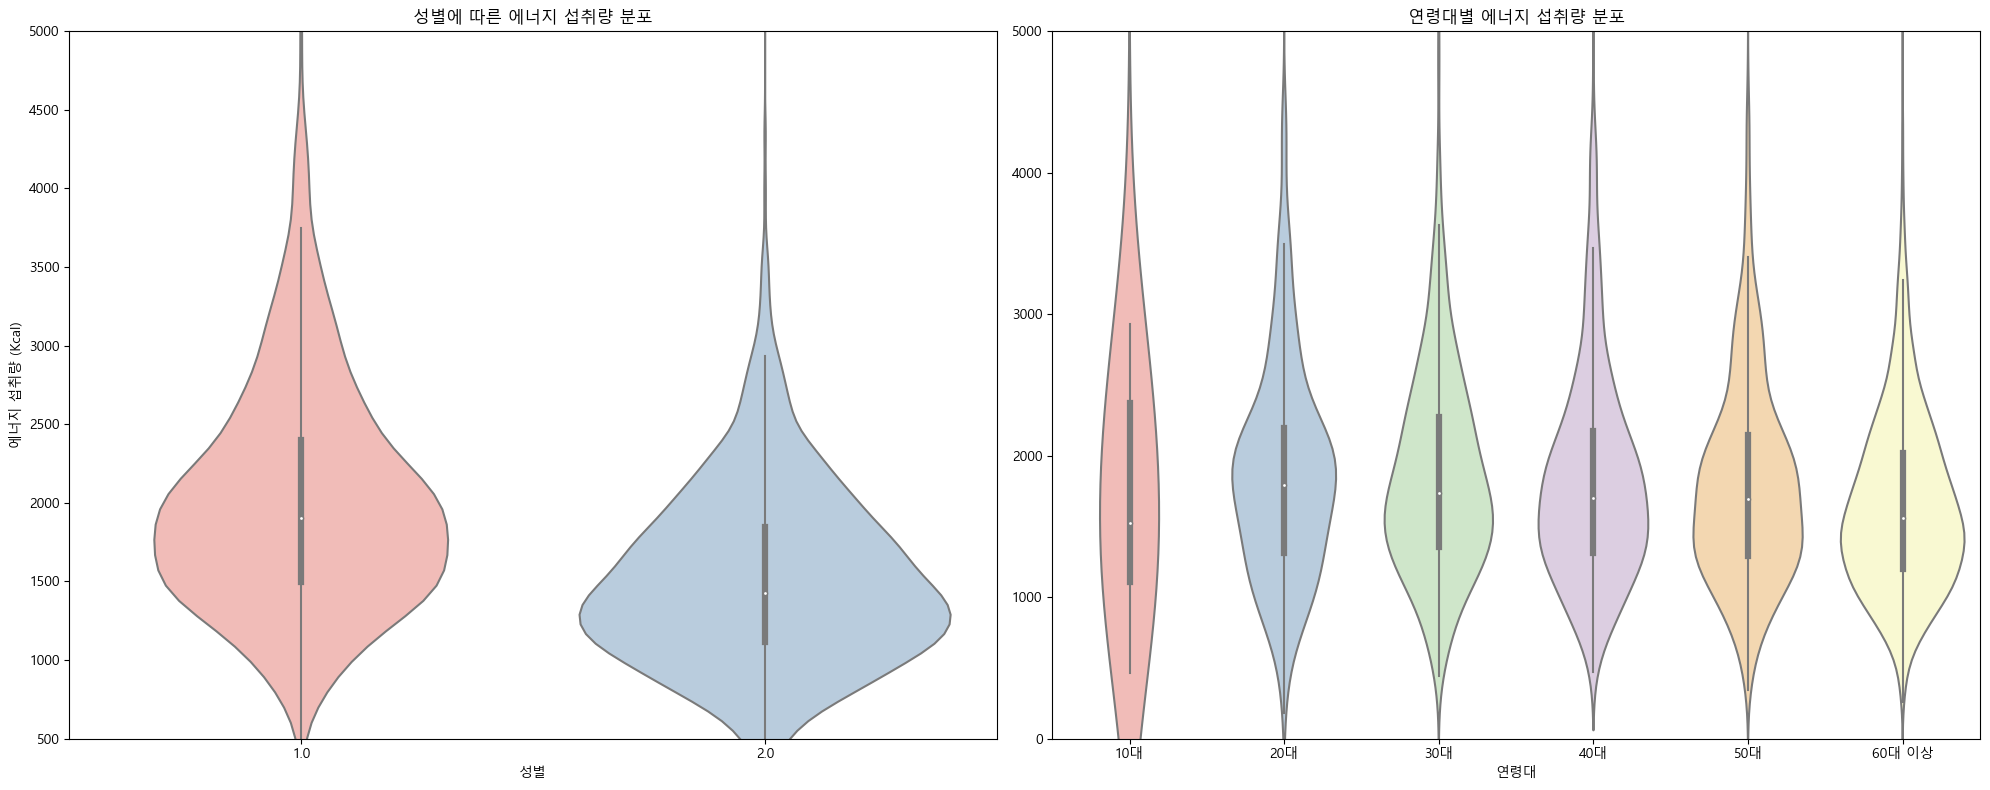

In [18]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 성별에 따른 에너지 섭취량 분포
sns.violinplot(data=korean_data, x='성별', y='에너지 섭취량(Kcal)', palette='Pastel1', ax=axes[0])
axes[0].set_title("성별에 따른 에너지 섭취량 분포")
axes[0].set_ylim(500,5000)
axes[0].set_xlabel("성별")
axes[0].set_ylabel("에너지 섭취량 (Kcal)")

# 연령대별 에너지 섭취량 분포
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
korean_data['연령대'] = pd.cut(korean_data['나이'], bins=bins, labels=labels, right=False)

sns.violinplot(data=korean_data, x='연령대', y='에너지 섭취량(Kcal)', palette='Pastel1', ax=axes[1])
axes[1].set_title("연령대별 에너지 섭취량 분포")
axes[1].set_xlabel("연령대")
axes[1].set_ylabel("")
axes[1].set_ylim(0, 5000)  # y축 범위 설정

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

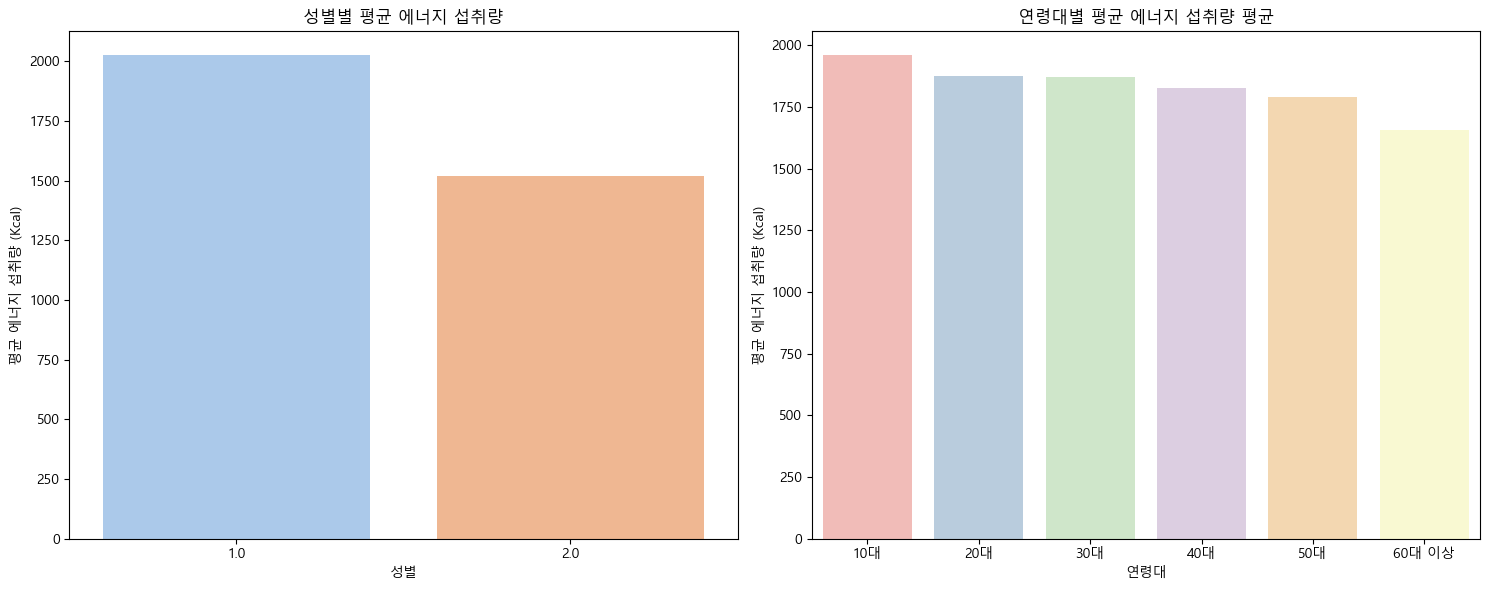

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 성별별 에너지 섭취량 평균 계산
gender_mean = korean_data.groupby('성별')['에너지 섭취량(Kcal)'].mean().reset_index()

# 연령대별 에너지 섭취량 평균 계산
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
age_group_mean = korean_data.groupby('연령대')['에너지 섭취량(Kcal)'].mean().reset_index()

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 성별 평균 그래프
sns.barplot(data=gender_mean, x='성별', y='에너지 섭취량(Kcal)', palette='pastel', ax=axes[0])
axes[0].set_title("성별별 평균 에너지 섭취량")
axes[0].set_xlabel("성별")
axes[0].set_ylabel("평균 에너지 섭취량 (Kcal)")

# 연령대 평균 그래프
sns.barplot(data=age_group_mean, x='연령대', y='에너지 섭취량(Kcal)', palette='Pastel1', ax=axes[1])
axes[1].set_title("연령대별 평균 에너지 섭취량 평균")
axes[1].set_xlabel("연령대")
axes[1].set_ylabel("평균 에너지 섭취량 (Kcal)")

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


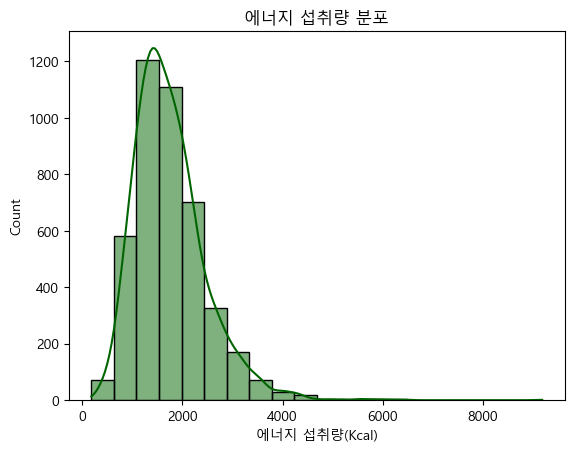

In [20]:
sns.histplot(korean_data['에너지 섭취량(Kcal)'], kde=True, color='darkgreen', bins=20)
plt.title("에너지 섭취량 분포")
plt.xlabel("에너지 섭취량(Kcal)")

plt.show()

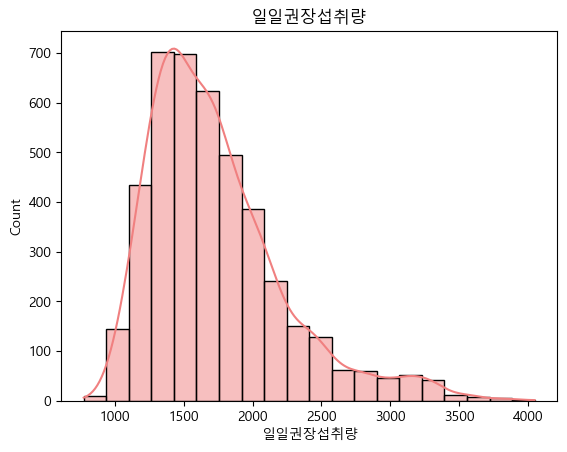

In [21]:
sns.histplot(korean_data['일일권장섭취량'], kde=True, color='lightcoral', bins=20)
plt.title("일일권장섭취량")
plt.xlabel("일일권장섭취량")
plt.show()

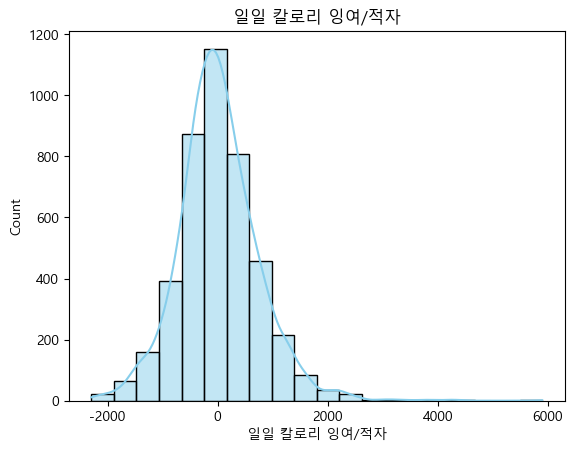

In [22]:
sns.histplot(korean_data['일일 칼로리 잉여/적자'], kde=True, color='skyblue', bins=20)
plt.title("일일 칼로리 잉여/적자")
plt.xlabel("일일 칼로리 잉여/적자")
plt.show()

In [23]:
korean_data.drop(columns=['연령대'], inplace=True)
korean_data.columns=['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']

In [24]:
# 학습할 데이터
pd.set_option('display.max_rows', 100)
weight_change=pd.read_csv('../data/weight_change_dataset.csv')
weight_change

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.200000,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.400000,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.400000,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.800000,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.000000,10,Lightly Active,Good,1,157.5
5,6,56,F,152.9,2100.6,2262.4,161.9,-12.513498,9,Sedentary,Poor,6,140.4
6,7,36,M,107.3,1991.3,2933.4,942.1,-2.437307,2,Moderately Active,Poor,5,104.9
7,8,40,M,207.9,2977.9,4000.0,1022.1,-35.678115,11,Moderately Active,Poor,9,172.2
8,9,28,F,169.5,2406.9,3890.2,1483.4,-8.476633,10,Very Active,Poor,1,161.0
9,10,28,F,169.2,2403.3,2485.8,82.5,0.000000,2,Sedentary,Excellent,7,169.2


In [25]:
weight_change.drop(['Participant ID','Sleep Quality','Stress Level','Final Weight (lbs)','Duration (weeks)'],axis=1,inplace=True)

In [26]:
weight_change=weight_change.rename(columns={'Age':'나이','Gender':'성별','Current Weight (lbs)':'체중','BMR (Calories)':'BMR','Daily Calories Consumed':'에너지 섭취량(Kcal)','Daily Caloric Surplus/Deficit':'일일 칼로리 잉여/적자','Weight Change (lbs)':'체중변화','Physical Activity Level':'활동량계수'})

In [27]:
# 조건에 따라 값 업데이트
weight_change.loc[weight_change['활동량계수'] == 'Sedentary', '활동량계수'] = '1.2'
weight_change.loc[weight_change['활동량계수'] == 'Lightly Active', '활동량계수'] = '1.375'
weight_change.loc[weight_change['활동량계수'] == 'Very Active', '활동량계수'] = '1.725'
weight_change.loc[weight_change['활동량계수'] == 'Moderately Active', '활동량계수'] = '1.55'
weight_change.loc[weight_change['성별'] == 'M', '성별']='1.0'
weight_change.loc[weight_change['성별'] == 'F', '성별']='2.0'

In [28]:
# 신장 초기화 (0으로 설정)
weight_change['신장'] = 0

# 남성: 성별이 M인 경우
weight_change.loc[weight_change['성별'] == '1.0', '신장'] = (
    ((weight_change['BMR']) -
     (10 * weight_change['체중']) +
     (5 * weight_change['나이']) -
     5) / 6.25
)

# 여성: 성별이 F인 경우
weight_change.loc[weight_change['성별'] == '2.0', '신장'] = (
    ((weight_change['BMR']) -
     (10 * weight_change['체중']) +
     (5 * weight_change['나이']) +
     161) / 6.25
)
weight_change

,나이,성별,체중,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화,활동량계수,신장
0,56,1.0,228.4,3102.3,3916.0,813.7,0.200000,1.2,174.928
1,46,2.0,165.4,2275.5,3823.0,1547.5,2.400000,1.725,162.000
2,32,2.0,142.8,2119.4,2785.4,666.0,1.400000,1.2,161.984
3,25,2.0,145.5,2181.3,2587.3,406.0,0.800000,1.2,161.968
4,38,1.0,155.5,2463.8,3312.8,849.0,2.000000,1.375,175.008
5,56,2.0,152.9,2100.6,2262.4,161.9,-12.513498,1.2,162.016
6,36,1.0,107.3,1991.3,2933.4,942.1,-2.437307,1.55,174.928
7,40,1.0,207.9,2977.9,4000.0,1022.1,-35.678115,1.55,175.024
8,28,2.0,169.5,2406.9,3890.2,1483.4,-8.476633,1.725,162.064
9,28,2.0,169.2,2403.3,2485.8,82.5,0.000000,1.2,161.968


In [29]:
weight_change['체중']=weight_change['체중']*0.453592

In [30]:
weight_change['체중변화']=weight_change['체중변화']*0.453592

In [31]:
weight_change['성별']=pd.to_numeric(weight_change['성별'])

In [32]:
weight_change.to_csv('../data/weight_predict.csv',index=False)

In [33]:
dataset=pd.read_csv('../data/weight_predict.csv',delimiter=',',encoding='utf8')
new_order=['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자','체중변화']
dataset=dataset[new_order]
dataset

,나이,성별,신장,체중,활동량계수,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화
0,56,1.0,174.928,103.600413,1.200,3102.3,3916.0,813.7,0.090718
1,46,2.0,162.000,75.024117,1.725,2275.5,3823.0,1547.5,1.088621
2,32,2.0,161.984,64.772938,1.200,2119.4,2785.4,666.0,0.635029
3,25,2.0,161.968,65.997636,1.200,2181.3,2587.3,406.0,0.362874
4,38,1.0,175.008,70.533556,1.375,2463.8,3312.8,849.0,0.907184
5,56,2.0,162.016,69.354217,1.200,2100.6,2262.4,161.9,-5.676023
6,36,1.0,174.928,48.670422,1.550,1991.3,2933.4,942.1,-1.105543
7,40,1.0,175.024,94.301777,1.550,2977.9,4000.0,1022.1,-16.183308
8,28,2.0,162.064,76.883844,1.725,2406.9,3890.2,1483.4,-3.844933
9,28,2.0,161.968,76.747766,1.200,2403.3,2485.8,82.5,0.000000


In [34]:
# BMR 계산 함수
def calculate_bmr(dataset):
    if dataset["성별"] == 1.0:  # 남성
        return 10 * dataset["체중"] + 6.25 * dataset["신장"] - 5 * dataset["나이"] + 5
    elif dataset["성별"] == 2.0:  # 여성
        return 10 * dataset["체중"] + 6.25 * dataset["신장"] - 5 * dataset["나이"] - 161

# BMR 열 추가
dataset["BMR"] = dataset.apply(calculate_bmr, axis=1)

dataset['에너지 섭취량(Kcal)'] =dataset['에너지 섭취량(Kcal)']*0.453592*dataset['활동량계수']
dataset['일일 칼로리 잉여/적자'] =dataset['에너지 섭취량(Kcal)']-dataset["BMR"]*dataset['활동량계수']
dataset

,나이,성별,신장,체중,활동량계수,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화
0,56,1.0,174.928,103.600413,1.200,1854.304128,2131.519526,-93.645427,0.090718
1,46,2.0,162.000,75.024117,1.725,1371.741168,2991.291823,625.038308,1.088621
2,32,2.0,161.984,64.772938,1.200,1339.129376,1516.122188,-90.833063,0.635029
3,25,2.0,161.968,65.997636,1.200,1386.276360,1408.294298,-255.237334,0.362874
4,38,1.0,175.008,70.533556,1.375,1614.135560,2066.156919,-153.279476,0.907184
5,56,2.0,162.016,69.354217,1.200,1265.142168,1231.447849,-286.722753,-5.676023
6,36,1.0,174.928,48.670422,1.550,1405.004216,2062.378498,-115.378037,-1.105543
7,40,1.0,175.024,94.301777,1.550,1841.917768,2812.270400,-42.702140,-16.183308
8,28,2.0,162.064,76.883844,1.725,1480.738440,3043.872207,489.598398,-3.844933
9,28,2.0,161.968,76.747766,1.200,1478.777664,1353.046792,-421.486404,0.000000


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
# 종속변수 : 체중변화 # 독립변수: 나머지변수
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X= dataset[['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']]
X_scaled = scaler_X.fit_transform(X)
y= dataset[['체중변화']]
y_scaled = scaler_y.fit_transform(y)

Text(0.5, 1.0, 'Korean Data Correlation')

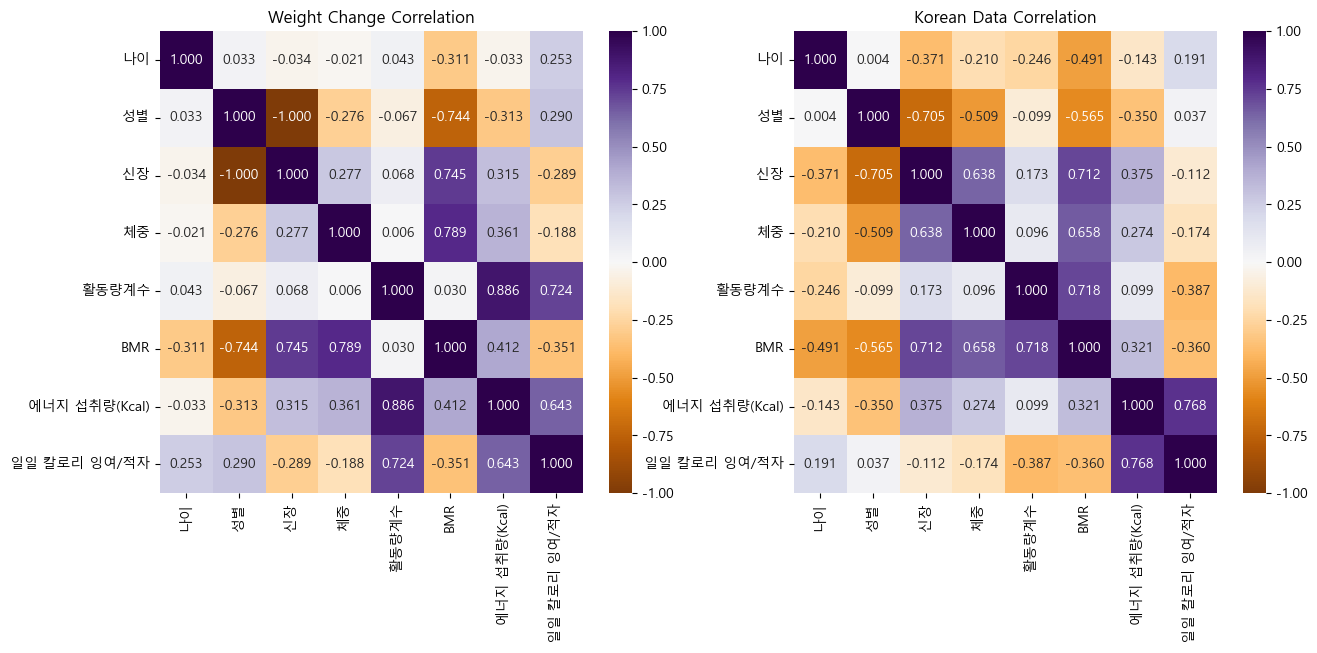

In [37]:
# 상관관계

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# 첫 번째 서브플롯: weight_change 데이터 상관관계 히트맵
sns.heatmap(
    X.corr(numeric_only=True), 
    vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='PuOr', 
    ax=axes[0]
)
axes[0].set_title("Weight Change Correlation")

# 두 번째 서브플롯: korean_data 데이터 상관관계 히트맵
sns.heatmap(
    korean_data.corr(numeric_only=True), 
    vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='PuOr', 
    ax=axes[1]
)
axes[1].set_title("Korean Data Correlation")

C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\670444437.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weight_change[var], label='학습 데이터', color='blue', shade=True)
C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\670444437.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(korean_data[var], label='예측 데이터', color='red', shade=True)


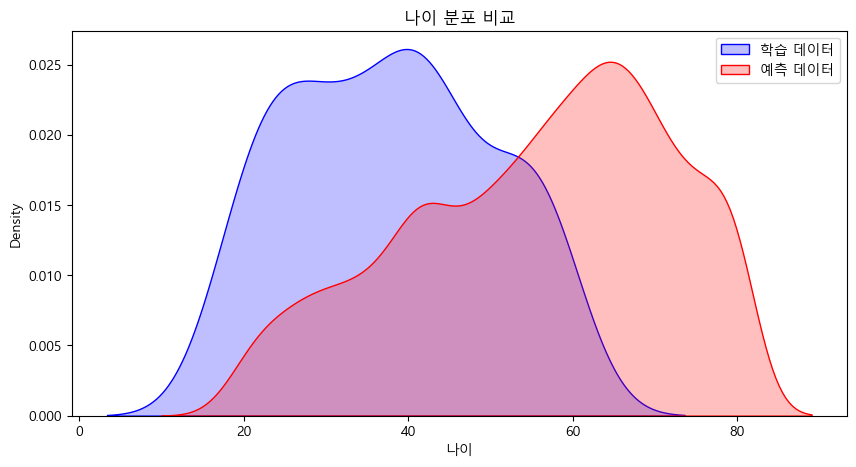

C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\670444437.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weight_change[var], label='학습 데이터', color='blue', shade=True)
C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\670444437.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(korean_data[var], label='예측 데이터', color='red', shade=True)


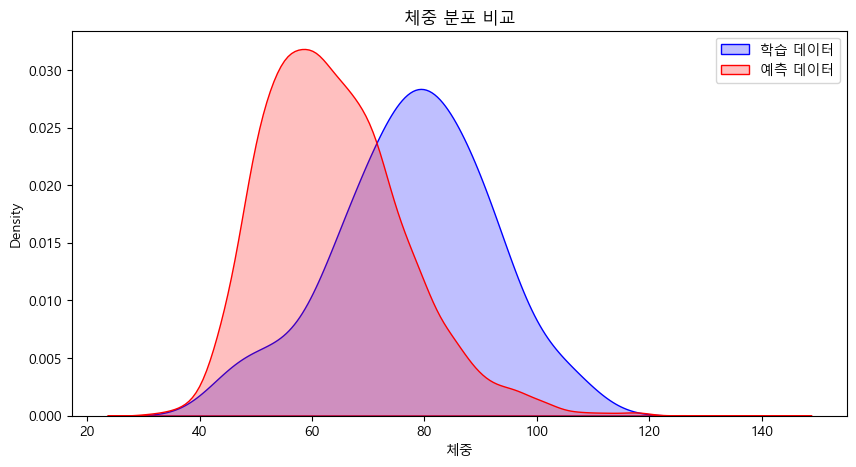

C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\670444437.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weight_change[var], label='학습 데이터', color='blue', shade=True)
C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\670444437.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(korean_data[var], label='예측 데이터', color='red', shade=True)


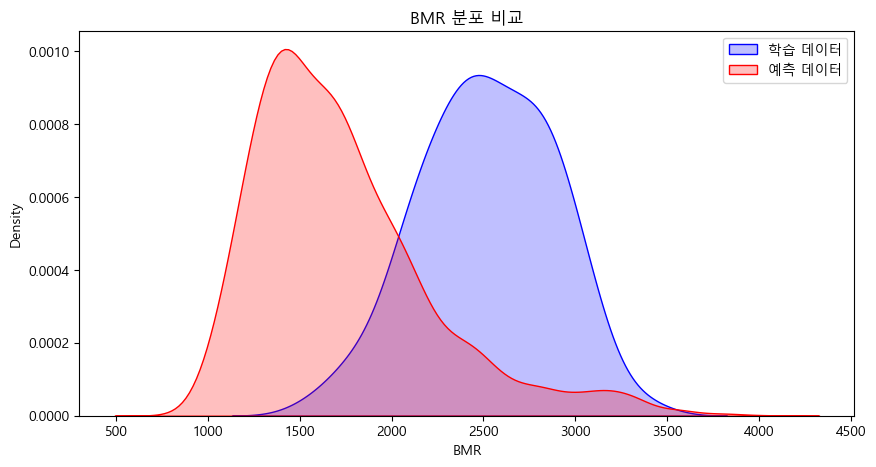

C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\670444437.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weight_change[var], label='학습 데이터', color='blue', shade=True)
C:\Users\soomi\AppData\Local\Temp\ipykernel_13456\670444437.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(korean_data[var], label='예측 데이터', color='red', shade=True)


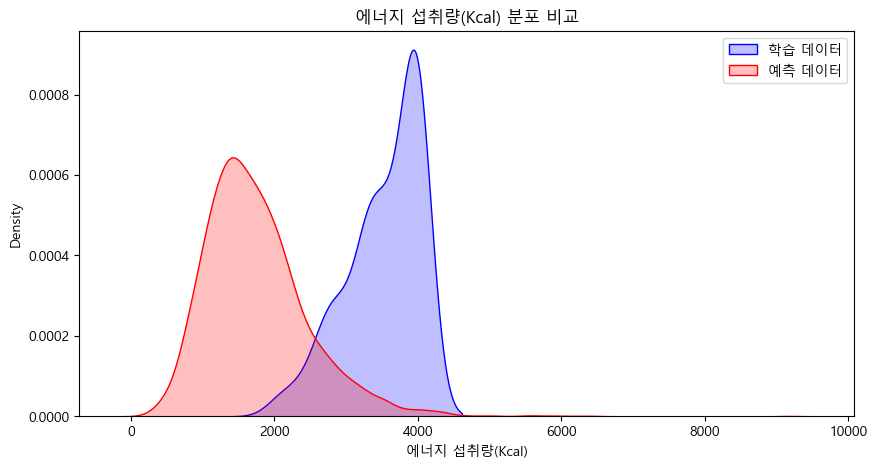

In [38]:
# 변수별 분포 비교
variables = ['나이', '체중', 'BMR', '에너지 섭취량(Kcal)']

for var in variables:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(weight_change[var], label='학습 데이터', color='blue', shade=True)
    sns.kdeplot(korean_data[var], label='예측 데이터', color='red', shade=True)
    plt.title(f'{var} 분포 비교')
    plt.legend()
    plt.show()

In [39]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,)

X_train.shape, y_train.shape,X_test.shape,y_test.shape

((80, 8), (80, 1), (20, 8), (20, 1))

In [40]:
# 모델 구성
model = Sequential()
model.add(Dense(128, activation='LeakyReLU', input_dim =8))  # 입력층

model.add(Dense(64, activation='LeakyReLU'))  # 은닉층
model.add(Dense(32, activation='LeakyReLU'))  # 은닉층

model.add(Dense(1,activation='linear'))  # 출력층

# 모델 요약 출력
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 4. 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss='mse',optimizer="adam",metrics=['mae'])
loss, mae = model.evaluate(X_test, y_test)
print(f"테스트 세트 - 손실(MSE): {loss:.4f}, 평균 절대 오차(MAE): {mae:.4f}")

1/1 [==============================] - 1s 800ms/step - loss: 0.3381 - mae: 0.5148
테스트 세트 - 손실(MSE): 0.3381, 평균 절대 오차(MAE): 0.5148


In [42]:
# 5. 학습시키기
hist = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=200, batch_size=32)

Epoch 1/200
2/2 [==============================] - 0s 52ms/step - loss: 1.3487 - mae: 0.8163 - val_loss: 0.5883 - val_mae: 0.6328
Epoch 2/200
2/2 [==============================] - 0s 19ms/step - loss: 1.2282 - mae: 0.7589 - val_loss: 0.6409 - val_mae: 0.6379
Epoch 3/200
2/2 [==============================] - 0s 21ms/step - loss: 1.2013 - mae: 0.7570 - val_loss: 0.7023 - val_mae: 0.6580
Epoch 4/200
2/2 [==============================] - 0s 19ms/step - loss: 1.1672 - mae: 0.7517 - val_loss: 0.7577 - val_mae: 0.6818
Epoch 5/200
2/2 [==============================] - 0s 21ms/step - loss: 1.1494 - mae: 0.7522 - val_loss: 0.7919 - val_mae: 0.7009
Epoch 6/200
2/2 [==============================] - 0s 23ms/step - loss: 1.1339 - mae: 0.7512 - val_loss: 0.8039 - val_mae: 0.7106
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 1.1140 - mae: 0.7416 - val_loss: 0.8078 - val_mae: 0.7158
Epoch 8/200
2/2 [==============================] - 0s 22ms/step - loss: 1.0950 - mae: 0.72

2/2 [==============================] - 0s 20ms/step - loss: 0.4503 - mae: 0.4919 - val_loss: 1.2060 - val_mae: 0.8780
Epoch 64/200
2/2 [==============================] - 0s 20ms/step - loss: 0.4437 - mae: 0.4816 - val_loss: 1.2472 - val_mae: 0.8923
Epoch 65/200
2/2 [==============================] - 0s 22ms/step - loss: 0.4398 - mae: 0.4749 - val_loss: 1.2390 - val_mae: 0.8917
Epoch 66/200
2/2 [==============================] - 0s 20ms/step - loss: 0.4236 - mae: 0.4688 - val_loss: 1.1931 - val_mae: 0.8810
Epoch 67/200
2/2 [==============================] - 0s 20ms/step - loss: 0.4194 - mae: 0.4719 - val_loss: 1.1679 - val_mae: 0.8734
Epoch 68/200
2/2 [==============================] - 0s 20ms/step - loss: 0.4170 - mae: 0.4744 - val_loss: 1.1650 - val_mae: 0.8666
Epoch 69/200
2/2 [==============================] - 0s 20ms/step - loss: 0.4157 - mae: 0.4725 - val_loss: 1.2149 - val_mae: 0.8815
Epoch 70/200
2/2 [==============================] - 0s 21ms/step - loss: 0.4315 - mae: 0.4711 - 

2/2 [==============================] - 0s 22ms/step - loss: 0.1646 - mae: 0.2547 - val_loss: 1.3282 - val_mae: 0.8966
Epoch 126/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1720 - mae: 0.2612 - val_loss: 1.2773 - val_mae: 0.8938
Epoch 127/200
2/2 [==============================] - 0s 20ms/step - loss: 0.1561 - mae: 0.2499 - val_loss: 1.2428 - val_mae: 0.8912
Epoch 128/200
2/2 [==============================] - 0s 20ms/step - loss: 0.1581 - mae: 0.2535 - val_loss: 1.2768 - val_mae: 0.8881
Epoch 129/200
2/2 [==============================] - 0s 18ms/step - loss: 0.1516 - mae: 0.2421 - val_loss: 1.2989 - val_mae: 0.8824
Epoch 130/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1534 - mae: 0.2457 - val_loss: 1.2779 - val_mae: 0.8818
Epoch 131/200
2/2 [==============================] - 0s 22ms/step - loss: 0.1458 - mae: 0.2417 - val_loss: 1.2035 - val_mae: 0.8678
Epoch 132/200
2/2 [==============================] - 0s 20ms/step - loss: 0.1520 - mae: 0.

2/2 [==============================] - 0s 20ms/step - loss: 0.0631 - mae: 0.1656 - val_loss: 1.2800 - val_mae: 0.8882
Epoch 188/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0563 - mae: 0.1326 - val_loss: 1.3182 - val_mae: 0.8921
Epoch 189/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0619 - mae: 0.1426 - val_loss: 1.2718 - val_mae: 0.8926
Epoch 190/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0556 - mae: 0.1378 - val_loss: 1.2209 - val_mae: 0.8820
Epoch 191/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0608 - mae: 0.1660 - val_loss: 1.3015 - val_mae: 0.8926
Epoch 192/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0564 - mae: 0.1342 - val_loss: 1.3353 - val_mae: 0.9001
Epoch 193/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0567 - mae: 0.1437 - val_loss: 1.2752 - val_mae: 0.8944
Epoch 194/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0541 - mae: 0.

In [43]:
hist.history

{'loss': [1.3487049341201782,
  1.2281851768493652,
  1.2012968063354492,
  1.1672403812408447,
  1.1493843793869019,
  1.133901596069336,
  1.114005208015442,
  1.09503972530365,
  1.0749223232269287,
  1.0617597103118896,
  1.0496106147766113,
  1.037292242050171,
  1.0205471515655518,
  1.0093441009521484,
  0.9997855424880981,
  0.9867852926254272,
  0.9747484922409058,
  0.9568225145339966,
  0.9444305896759033,
  0.9310969710350037,
  0.9179227948188782,
  0.9066275358200073,
  0.8937700390815735,
  0.883057177066803,
  0.8684536814689636,
  0.8554482460021973,
  0.8481422066688538,
  0.8300437927246094,
  0.817156195640564,
  0.8014305830001831,
  0.788834810256958,
  0.7758972644805908,
  0.7635648250579834,
  0.757967472076416,
  0.7406142950057983,
  0.7285141348838806,
  0.7156807780265808,
  0.7036464214324951,
  0.6935308575630188,
  0.6805009841918945,
  0.666574239730835,
  0.6534883379936218,
  0.6502732038497925,
  0.6312772631645203,
  0.618369460105896,
  0.612557888

In [44]:
y_pred = model.predict(X_test)
for y,h in zip(y_test,y_pred):
    print(f'실제값:{y},예측값:{h[0]:.2f}')

1/1 [==============================] - 0s 60ms/step
실제값:[0.57785333],예측값:-0.75
실제값:[0.59135515],예측값:0.17
실제값:[0.96940623],예측값:0.84
실제값:[0.57785333],예측값:1.03
실제값:[0.64536245],예측값:0.94
실제값:[0.64536245],예측값:0.52
실제값:[0.48334056],예측값:1.01
실제값:[-0.3780377],예측값:0.17
실제값:[0.07781244],예측값:1.16
실제값:[-0.22615857],예측값:-0.08
실제값:[1.05041717],예측값:0.61
실제값:[0.65886427],예측값:0.91
실제값:[-0.12137046],예측값:0.32
실제값:[0.41583144],예측값:-1.63
실제값:[0.22196869],예측값:-2.13
실제값:[0.57785333],예측값:-0.79
실제값:[0.75337704],예측값:-0.00
실제값:[0.48334056],예측값:0.26
실제값:[-0.2666616],예측값:-0.13
실제값:[0.40232962],예측값:1.59


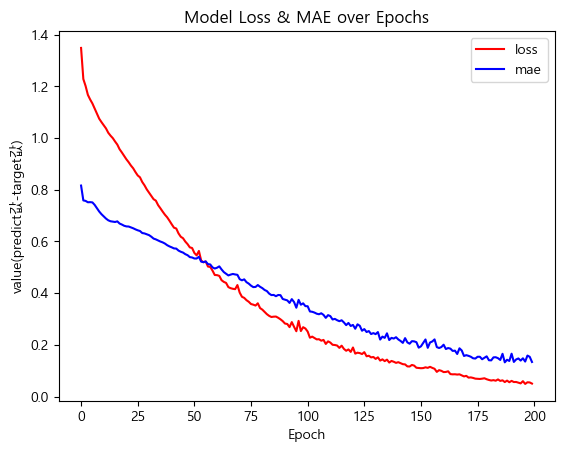

In [45]:
plt.plot(hist.history['loss'],'r',label='loss')
plt.plot(hist.history['mae'],'b',label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value(predict값-target값)')
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [46]:
# 역스케일조정
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)
for y,h in zip(y_test_original,y_pred_original):
    print(f'실제값:{y[0]:.2f},예측값:{h[0]:.2f}')

실제값:0.68,예측값:-3.77
실제값:0.73,예측값:-0.69
실제값:2.00,예측값:1.55
실제값:0.68,예측값:2.22
실제값:0.91,예측값:1.89
실제값:0.91,예측값:0.48
실제값:0.36,예측값:2.12
실제값:-2.53,예측값:-0.70
실제값:-1.00,예측값:2.64
실제값:-2.02,예측값:-1.53
실제값:2.27,예측값:0.78
실제값:0.95,예측값:1.79
실제값:-1.67,예측값:-0.19
실제값:0.14,예측값:-6.73
실제값:-0.52,예측값:-8.40
실제값:0.68,예측값:-3.92
실제값:1.27,예측값:-1.26
실제값:0.36,예측값:-0.40
실제값:-2.16,예측값:-1.71
실제값:0.09,예측값:4.10


In [48]:
# 한국인 데이터로 예측해보기
y_pred_scaled= scaler_X.transform(korean_data)
korean_pred = model.predict(y_pred_scaled)
korean_pred

135/135 [==============================] - 0s 803us/step


array([[ 0.180431  ],
       [ 0.93377924],
       [ 2.2618866 ],
       ...,
       [ 0.5252451 ],
       [-4.954014  ],
       [ 3.9756546 ]], dtype=float32)

In [49]:
weight_predict=[]
korean_pred_original = scaler_y.inverse_transform(korean_pred)
for idx, i in enumerate(korean_pred_original):
    print(f"{idx + 1}번째: 몸무게변화예측 = {i[0]:.2f}")
    weight_predict.append([i[0]])
korean_data['체중변화예측']=weight_predict

1번째: 몸무게변화예측 = -0.65
2번째: 몸무게변화예측 = 1.88
3번째: 몸무게변화예측 = 6.34
4번째: 몸무게변화예측 = 7.78
5번째: 몸무게변화예측 = 2.59
6번째: 몸무게변화예측 = 1.38
7번째: 몸무게변화예측 = 1.59
8번째: 몸무게변화예측 = -5.18
9번째: 몸무게변화예측 = -35.34
10번째: 몸무게변화예측 = 8.16
11번째: 몸무게변화예측 = -8.65
12번째: 몸무게변화예측 = 2.97
13번째: 몸무게변화예측 = 7.11
14번째: 몸무게변화예측 = -1.24
15번째: 몸무게변화예측 = -2.95
16번째: 몸무게변화예측 = -0.52
17번째: 몸무게변화예측 = 1.69
18번째: 몸무게변화예측 = 5.41
19번째: 몸무게변화예측 = -14.49
20번째: 몸무게변화예측 = -19.34
21번째: 몸무게변화예측 = 1.64
22번째: 몸무게변화예측 = 13.15
23번째: 몸무게변화예측 = -4.65
24번째: 몸무게변화예측 = -3.56
25번째: 몸무게변화예측 = 1.41
26번째: 몸무게변화예측 = -0.46
27번째: 몸무게변화예측 = 4.40
28번째: 몸무게변화예측 = 3.50
29번째: 몸무게변화예측 = 3.50
30번째: 몸무게변화예측 = 1.49
31번째: 몸무게변화예측 = -6.97
32번째: 몸무게변화예측 = -1.38
33번째: 몸무게변화예측 = -23.54
34번째: 몸무게변화예측 = 10.00
35번째: 몸무게변화예측 = 2.92
36번째: 몸무게변화예측 = -0.45
37번째: 몸무게변화예측 = 2.01
38번째: 몸무게변화예측 = -0.49
39번째: 몸무게변화예측 = -47.00
40번째: 몸무게변화예측 = 0.84
41번째: 몸무게변화예측 = -17.41
42번째: 몸무게변화예측 = -1.85
43번째: 몸무게변화예측 = -39.71
44번째: 몸무게변화예측 = 3.54
45번째: 몸무게변화예측 = -6.07
46번째: 몸무게변화예측 = -2.92
47번째: 몸무게변화

In [51]:
korean_data.to_csv('../data/korean_data_pred.csv',index= False)